In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import shutil
import numpy as np
import torch.nn as nn
import torch
import torchvision.transforms as transforms


from torch import Generator
from torch.utils.data import Dataset, DataLoader, Subset, random_split, SubsetRandomSampler
from sklearn.model_selection import train_test_split

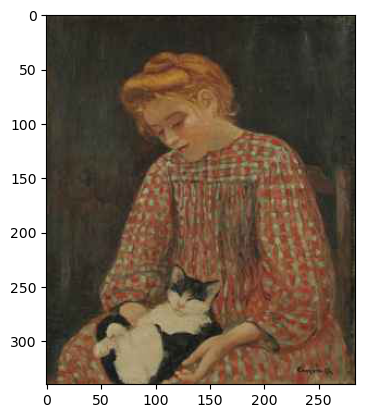

In [14]:
base_path = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Pandora_18k_Merged\\"

folders = [ f.path for f in os.scandir(base_path) if f.is_dir() ]
classes_names = [ f.name for f in os.scandir(base_path) if f.is_dir() ]
classes = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"]


image_path_by_class = []
aux_str = []

for folder in folders:
    aux_str = folder + "//" + "*.jpg"
    image_path_by_class.append(glob.glob(aux_str))

test_img = cv2.imread(image_path_by_class[12][2])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)


In [15]:
labels = []
for index, class_path in enumerate(image_path_by_class):
  tmp = []
  for img_path in class_path:
    label = img_path.split("\\")[6]
    tmp.append(label)
  labels.append(tmp)

# labels=np.array(labels)

print(len(labels[2]))
print(len(image_path_by_class[2]))

len(labels)


802
802


18

16_AbstractArt


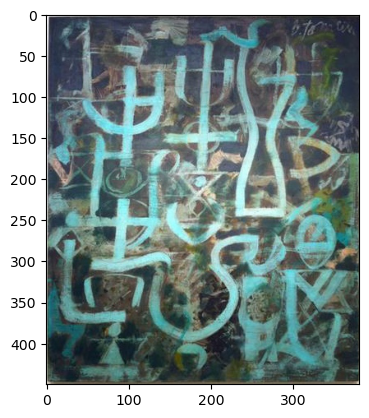

In [16]:
class_name = 15
picture = 112

test_img = cv2.imread(image_path_by_class[class_name][picture])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

print(labels[class_name][picture])

In [17]:
data = image_path_by_class
data = []
labels_merged = []
for class_index in range(len(image_path_by_class)):
    for img_index in range(len(image_path_by_class[class_index])):
        data.append(image_path_by_class[class_index][img_index])

for class_index in range(len(labels)):
    for img_index in range(len(labels[class_index])):
        labels_merged.append(labels[class_index][img_index])

print(len(data))

train_data0, test_data0 = random_split(data, [0.7, 0.3], generator=Generator().manual_seed(42))

train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    labels_merged,
    test_size=0.2,
    random_state=42
)
print("Test and Train:")
print(len(train_data))
print(len(test_data))
print("-----------")
print(len(train_labels))
print(len(test_labels))




17591
Test and Train:
14072
3519
-----------
14072
3519


In [18]:
destination = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Painting-Retrieval\PandoraTrain"

for source in train_data:
    shutil.copy(source, destination)

12_Symbolism


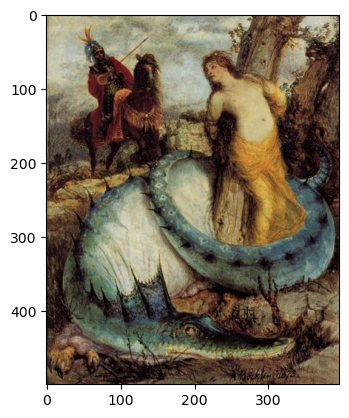

In [8]:
picture = 1000

test_img = cv2.imread(train_data[picture])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

print(train_labels[picture])

In [19]:
destination = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Painting-Retrieval\PandoraTest"

for source in test_data:
    shutil.copy(source, destination)

In [9]:
f = open("Pandora_Train_labels.csv", "w")

for index in range(len(train_data)):
    f.write(train_data[index])
    f.write(", ")
    f.write(train_labels[index])
    f.write("\n")

f = open("Pandora_Test_labels.csv", "w")

for index in range(len(test_data)):
    f.write(test_data[index])
    f.write(", ")
    f.write(test_labels[index])
    f.write("\n")


05_Baroque


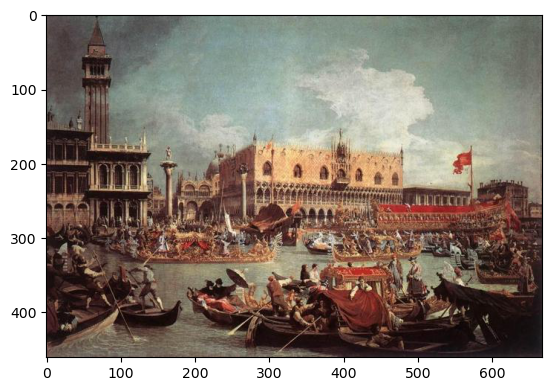

In [11]:
picture = 5

test_img = cv2.imread(test_data[picture])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

print(test_labels[picture])

In [ ]:
  
data = []
transform = transforms.Compose([transforms.ToTensor()])



for img_path in train_data:
    test_img = cv2.imread(img_path)
    if(test_img is not None):
        test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
        tensor = transform(test_img)

print(tensor)

tensor([[[0.1765, 0.1765, 0.2118,  ..., 0.2941, 0.3137, 0.3333],
         [0.1725, 0.2078, 0.2667,  ..., 0.2980, 0.3098, 0.3255],
         [0.2314, 0.2627, 0.2941,  ..., 0.2784, 0.2902, 0.2980],
         ...,
         [0.2275, 0.2039, 0.1647,  ..., 0.1843, 0.4000, 0.9922],
         [0.2157, 0.2314, 0.2000,  ..., 0.1922, 0.4353, 1.0000],
         [0.2471, 0.1765, 0.1569,  ..., 0.2118, 0.4745, 1.0000]],

        [[0.1804, 0.1804, 0.2157,  ..., 0.3255, 0.3451, 0.3647],
         [0.1765, 0.2118, 0.2706,  ..., 0.3294, 0.3412, 0.3569],
         [0.2353, 0.2667, 0.2980,  ..., 0.3020, 0.3137, 0.3216],
         ...,
         [0.2431, 0.2196, 0.1804,  ..., 0.2039, 0.4157, 0.9961],
         [0.2314, 0.2471, 0.2157,  ..., 0.2118, 0.4510, 1.0000],
         [0.2549, 0.1922, 0.1725,  ..., 0.2314, 0.4902, 1.0000]],

        [[0.1490, 0.1490, 0.1843,  ..., 0.3765, 0.3961, 0.4157],
         [0.1451, 0.1804, 0.2392,  ..., 0.3804, 0.3922, 0.4078],
         [0.2039, 0.2353, 0.2667,  ..., 0.3490, 0.3608, 0.

In [20]:
class DatasetPandora(Dataset):
    def __init__(self, images, labels):
        
        transform = transforms.Compose([transforms.ToTensor()])
  
        self.data = []

        for img_path in images:
            test_img = cv2.imread(img_path)
            if(test_img is not None):
                test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
                tensor = transform(test_img)
                self.data.append(tensor)

        self.labels = labels
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        batch_data = self.data[idx]
        label = self.labels[idx]

        batch = {'data': batch_data, 'label': label}

        return batch

train_data_dataset = DatasetPandora(test_data, test_labels)
# train_loader = DataLoader(train_data_dataset, batch_size=128, shuffle=True, num_workers=0)

# test_data_dataset = DatasetPandora(test_data, train_labels)
# test_loader = DataLoader(test_data_dataset, batch_size=128)

# # trainloader = DataLoader(mnist_data, batch_size=128, shuffle=True, num_workers=0)
# for batch in train_loader:
#     print(type(batch["data"]))
#     print(type(batch["label"]))

    # batch_data = batch['data']
    # batch_labels = batch['label']

KeyboardInterrupt: 

In [ ]:
class Retea_CNN(nn.Module):
    
    def __init__(self, nr_clase):
        # INPUT: 1 channel, OUTPUT: 18 classes
        super(Retea_CNN,self).__init__()
        
        # CONV => RELU => POOL 
        # IN: 1, 28, 28  (canale, linii, coloane)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, 
                            stride = [1,1], 
                            padding = [1,1])
        self.relu1 = nn.ReLU()
        # 3, 28, 28
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # CONV => RELU => POOL 
        # 3, 14, 14
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=[3,3], 
                            stride = [1,1], 
                            padding = [1,1])
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=[2, 2], stride=(2, 2))
        
        # FC 
        #9, 7, 7
        self.fc1 = nn.Linear(in_features=9*7*7, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=nr_clase)
        
        #self.hidden_layer = nn.Linear(nr_neuroni_input, nr_neuroni_hidden)
        #self.out_layer = nn.Linear(nr_neuroni_hidden, nr_clase)
        
    def forward(self,input_batch):
        # Intr-un MLP, intrarea este sub forma unui vector, deci un batch
        # este o matrice de dimensiunea nr_esantioane_batch x dimensiune esantion
        #input_batch = torch.from_numpy(input_batch)
        #hidden = self.hidden_layer(input_batch)
        #out = self.out_layer(hidden)
        
        # input_batch = torch.from_numpy(input_batch)
        
        # I
        x = self.conv1(input_batch)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        # II
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
    
        # flatten
        x = torch.flatten(x, 1, 3)
        
        # FC
        x = self.fc1(x)
        x = self.relu3(x)
        
        x = self.fc2(x)
        
        return x
    
# Instantiem reteaua
cnn = Retea_CNN(18)

In [ ]:
nr_epoci = 15

loss_function = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(cnn.parameters(), lr=1e-5)

for ep in range(nr_epoci):
    predictii = []
    etichete = []

    for batch in train_loader:
        print(type(batch["data"]))
        batch_data = batch['data']
        batch_labels = np.array(batch['label'])
        # Se calculeaza predictia retelei pentru datele curente (forward pass/ propagare inainte)
        current_predict = cnn.forward(batch_data)

        # Se calculeaza valoarea momentana a functiei loss
        loss = loss_function(current_predict, batch_labels) 
        
        # Se memoreaza predictiile si etichetele aferente batch-ului actual (pentru calculul acuratetii)
        current_predict = np.argmax(current_predict.detach().numpy(), axis=1)
        predictii = np.concatenate((predictii,current_predict))
        etichete = np.concatenate((etichete,batch_labels))
        
        # Antrenarea propriu-zisa
        
            # 1. Se sterg toti gradientii calculati anteriori, pentru toate variabilele antrenabile
            # deoarece, metoda <backward> acumuleaza noile valori, in loc sa le inlocuiasca.
        optim.zero_grad()
            # 2. Calculul tuturor gradientilor. Backpropagation
        loss.backward()
            # 3. Actualizarea tuturor ponderilor, pe baza gradientilor.
        optim.step()
        
        

    # Calculam acuratetea
    acc = np.sum(predictii==etichete)/len(predictii)
    print( 'Acuratetea la epoca {} este {}%'.format(ep+1,acc*100) )

predictii = []
test_labels = []
for batch in test_loader:
    batch_data = batch['date']
    batch_labels = batch['etichete']

    current_predict = cnn.forward(batch_data)
    current_predict = np.argmax(current_predict.detach().numpy(),axis=1)
    predictii = np.concatenate((predictii,current_predict))
    test_labels = np.concatenate([test_labels, batch_labels])

acc = np.sum(predictii==test_labels)/len(predictii)
print( 'Acuratetea la test este {}%'.format(acc*100) )

# TESTS

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

training_data = CustomImageDataset("Pandora_Train_labels.csv", "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Painting-Retrieval\PandoraTrain" )
training_data = CustomImageDataset("Pandora_Test_labels.csv", "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Painting-Retrieval\PandoraTest" )

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
def unique(list1):

    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
        # print list
    for x in unique_list:
        print(x)

In [ ]:

# train_data, test_data, train_labels, test_labels= train_test_split(
# image_path_by_class,
# labels,
# test_size=0.2
# )

# # print(unique(train_labels))

# for i in range(len(train_labels)):
#     unique(train_labels[i])

# print("===")
# for i in range(len(test_labels)):
#     unique(test_labels[i])


In [ ]:
train_path = []
test_path = []

label_train = labels[:7] # y_train
label_test = labels[7:] # y_test

for a in image_path_by_class:
    clasa_t = []
    clasa_v = []
    for index, elem in enumerate(a):
        # print(index, elem)
        if(index < 7):
            clasa_t.append(elem)
        else:
            clasa_v.append(elem)
    train_path.append(clasa_t)
    test_path.append(clasa_v)

print(len(train_path[0]), len(test_path[0]))
# print("----------")
# print(test_path)

In [ ]:
# data = []
# for class_path in image_path_by_class:
#     images = []
#     for img_path in class_path:
#         aux_data = cv2.imread(img_path)
#         images.append(aux_data)
#     data.append(images)
# print(data)

# # labels = []
# # for class_path in image_path_by_class:
# #     tmp = []
# #     for img_path in class_path:
# #         label = img_path.split("\\")[6]
# #         tmp.append(label)
# #     labels.append(tmp)

# # print(len(data))
# # print(len(labels))

# # plt.figure()
# # plt.imshow(data[0])
# # plt.show()

In [ ]:
class DatasetPandora(Dataset):
    def __init__(self, image_path_by_class):
        
        data = []
        for class_path in image_path_by_class:
            aux_data = cv2.imread(image_path_by_class[7][2])
            aux_data = cv2.cvtColor(aux_data, cv2.COLOR_BGR2RGB)
            data.append(aux_data)
        
        labels = []
        for class_path in image_path_by_class:
            tmp = []
            for img_path in class_path:
                label = img_path.split("\\")[6]
                tmp.append(label)
            labels.append(tmp)


        self.data = data
        self.labels = labels

        # Conversii pentru a se potrivi cu procesul de antrenare    
        # self.data = data.astype(np.float32)
        # self.labels = labels.astype(np.int64)
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        batch_data = self.data[idx]
        label = self.labels[idx]

        batch = {'data': batch_data, 'labels': label}

        return batch

data = DatasetPandora(image_path_by_class)

train_loader = DataLoader(data, batch_size=128)

for batch in train_loader:
    print(batch['data'])


In [ ]:
data = DatasetPandora(image_path_by_class)

a, b = random_split(image_path_by_class, [0.3, 0.7], generator=Generator().manual_seed(42))

print(len(a[0]))
print(len(b[0]))

In [ ]:
dataset = trainDataset = DatasetPandora(image_path_by_class)
batch_size = 16
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

print(len(train_sampler))  
print(len(valid_sampler))  

In [ ]:
trainDataset = DatasetPandora(image_path_by_class)
trainLoader = DataLoader(trainDataset, batch_size=128, shuffle=True, num_workers=0)

In [ ]:
TEST_SIZE = 0.1
BATCH_SIZE = 64
SEED = 42

# full dataset
data = DatasetPandora(image_path_by_class)

# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices, _, _ = train_test_split(
    range(len(data)),
    classes,
    test_size=TEST_SIZE,
    random_state=SEED
)

# generate subset based on indices
train_split = Subset(data, train_indices)
test_split = Subset(data, test_indices)

# create batches
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
test_batches = DataLoader(test_split, batch_size=BATCH_SIZE)

for batch in trainLoader:
        batch_data = batch["data"]
        batch_labels = batch["labels"]
        print(batch_data)

# Making the romanian folders

In [ ]:
import pandas as pd

excel_name = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Romanian_paintings\\romanian_features_labels.xlsx"

df = pd.read_excel(excel_name, sheet_name="Lista-completa")

print(df[['image_id']].loc[0])
print(df[['style']].loc[0]['style'])


print("DataFrame after deleting rows...")


paintings = []
index = 0
current_artist = "First Author"

while index < 3369 and df[['image_id']].loc[index]['image_id'] != None:
    
    if current_artist != df[['artist_slug']].loc[index]['artist_slug']:
        tmp_index = 0
        while tmp_index < 5:
            paintings.append(df[['image_id']].loc[index]['image_id'])
            tmp_index += 1
            index += 1
        
    current_artist = df[['artist_slug']].loc[index]['artist_slug']
    df = df.drop(index)
    index += 1
    


print(len(paintings))
print(paintings)
# print(df[['image_id']].loc[0])
# print(df[['style']].loc[0]['style'])

df.to_excel(r'E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Romanian_paintings\\romanian_only_features_labels.xlsx', index=False)


In [ ]:
image_paths = []

path_rom = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Romanian_paintings\Images"
excel_name = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Romanian_paintings\\romanian_only_features_labels.xlsx"

data_frame = pd.read_excel(excel_name)

for index, artist in enumerate(data_frame['artist_slug']):
    # artist = data_frame[['artist_slug']].loc[artist_index]['artist_slug']
    artist = artist.title()
    # print(index, artist)
    picture_path = path_rom + "\\" + artist + "\\" + data_frame[['image_id']].loc[index]['image_id'] + ".jpg"
    image_paths.append(picture_path)

#  test_picture = path_rom + "\\" + artist + "\\" + data_frame[['image_id']].loc[10]['image_id'] + ".jpg"

# print(image_paths)

In [ ]:
destination = "E:\Lucru\ANUL II MASTER\MLAV\ProiectDificil\Romanian_Paintings_400"

for source in image_paths:
    destination_tmp = destination + "\\" + source.split("\\")[8]
    shutil.copy(source, destination_tmp)